## Import libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import display


In [8]:
warnings.filterwarnings('ignore')

In [9]:
sns.set(color_codes= True)

## Read the Data

In [21]:
try:
    df = pd.read_csv('../data/Ass1.csv',encoding = "ISO-8859-1")
    print('Data read successfully!')
except Exception as e:
    print('Error reading data: {}'.format(str(e)))
    
    

Data read successfully!


## Take a look at the data

In [22]:
df.head()

,Unnamed: 0,Voltage,External Force,Electron Velocity
0,0,3.820518,4.494468,-34.613902
1,1,1.201104,5.016538,-5.012535
2,2,2.582024,6.010351,-35.813271
3,3,1.780093,4.312141,-10.660236
4,4,4.117263,4.224125,-33.753378


In [23]:
df.tail()

,Unnamed: 0,Voltage,External Force,Electron Velocity
89995,89995,3.735786,4.935079,-43.082076
89996,89996,3.758063,3.405337,-19.706660
89997,89997,3.308771,3.754111,-19.559218
89998,89998,3.446039,3.353504,-19.672704
89999,89999,1.042189,4.481894,-2.936231


## Check on the size of the datasets

In [24]:
print('The data has {} entries and {} features'.format(df.shape[0],df.shape[1]))

The data has 90000 entries and 4 features


## Features Info

In [26]:
df.columns

Index(['Unnamed: 0', 'Voltage', 'External Force', ' Electron Velocity'], dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 4 columns):
Unnamed: 0            90000 non-null int64
Voltage               90000 non-null float64
External Force        90000 non-null float64
 Electron Velocity    90000 non-null float64
dtypes: float64(3), int64(1)
memory usage: 2.7 MB


## Data Cleaning

### Remove unwanted values

In [29]:
try:
    df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)
    display(df.head())
except Exception as e:
    print(str(e))
    

,Voltage,External Force,Electron Velocity
0,3.820518,4.494468,-34.613902
1,1.201104,5.016538,-5.012535
2,2.582024,6.010351,-35.813271
3,1.780093,4.312141,-10.660236
4,4.117263,4.224125,-33.753378


In [31]:
## Remove leading spaces 
try:
    df.rename(columns={" Electron Velocity":"Electron Velocity"},inplace=True)
except Exception as e:
    print(str(e))

In [32]:
df.head()


,Voltage,External Force,Electron Velocity
0,3.820518,4.494468,-34.613902
1,1.201104,5.016538,-5.012535
2,2.582024,6.010351,-35.813271
3,1.780093,4.312141,-10.660236
4,4.117263,4.224125,-33.753378


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 3 columns):
Voltage              90000 non-null float64
External Force       90000 non-null float64
Electron Velocity    90000 non-null float64
dtypes: float64(3)
memory usage: 2.1 MB


## Check for the Missing values

In [34]:
null_values = df.isnull().sum()
pd.DataFrame({'Total':null_values})

,Total
Voltage,0
External Force,0
Electron Velocity,0


## Descriptive analysis

In [35]:
stats= df.describe()
stats


,Voltage,External Force,Electron Velocity
count,90000.000000,90000.000000,90000.000000
mean,2.996441,3.998019,-22.739101
std,1.582116,1.000124,23.226209
min,-3.628303,-0.716995,-227.315108
25%,1.925820,3.320945,-35.326850
50%,2.991972,3.995511,-18.357604
75%,4.065987,4.672128,-5.482308
max,10.592509,8.665784,50.081220


## Exploratory Data Analysis

<Figure size 720x576 with 0 Axes>

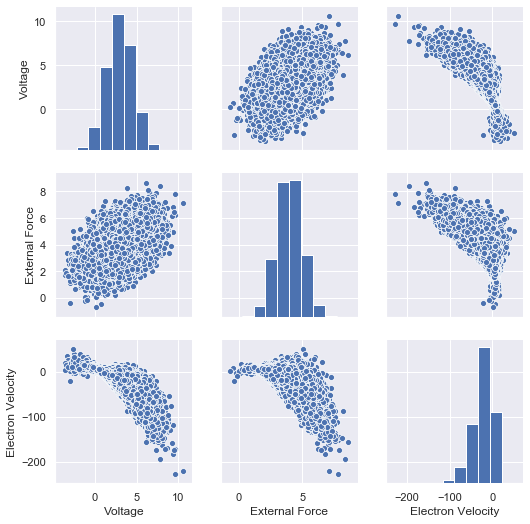

In [36]:
fig = plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()


## Correlation Checking

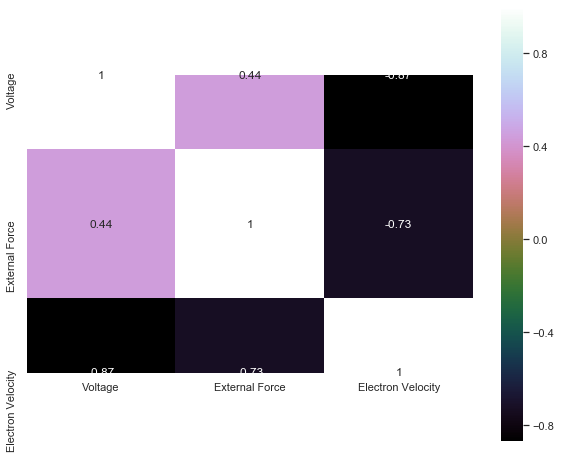

In [40]:
corr = df.corr()
fig = plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,square=True,cmap='cubehelix',vmax=1)
plt.show()




## Model Selection

In [41]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [42]:
#Extract the data
X = df.drop(columns='Electron Velocity',axis=1)
y=df['Electron Velocity'].values.reshape(-1,1)

In [68]:
#initialize the models and chooses the one with the best model
models = [Lasso(alpha=0.00001),LinearRegression(),Ridge()]
model_names=['Lasso','LR','Ridge']
scores ={}
for i,model in enumerate(models):
    score = np.mean(cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error'))
    scores[model_names[i]]=score
print(scores)
    
    


{'Lasso': -52.606206026104225, 'LR': -51.560531794059656, 'Ridge': -51.56053183872725}


## Model Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100]}


In [94]:
gridsearch =GridSearchCV(Lasso(),params,cv=5,scoring='neg_mean_squared_error')

In [95]:
gridsearch.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [96]:
best_params = gridsearch.best_params_

In [97]:
best_params

{'alpha': 0.0001}

## Check for the Best Score

In [52]:
gridsearch.best_score_

-51.56053335734666

## Model Training

In [53]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size=0.3,random_state =42)

In [55]:
model =Lasso()
model.fit(X_train,y_train)
## used to predict for y which will later be used for evaluation
preds =model.predict(X_test)

## Model Evaluation

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2 = r2_score(y_test,preds)

In [58]:
r2

0.9014382359548122

In [60]:
model.score(X_test,y_test)

0.9014382359548122

In [62]:
model.intercept_

array([43.20915475])

In [63]:
model.coef_

array([-9.84951485, -9.10871958])

In [64]:
'''y = 43.20915475-9.84951485x1-9.10871958x2'''

'y = 43.20915475-9.84951485x1-9.10871958x2'